### Set your Image Parameters Here

In [3]:
#Set your Input Image Path here:
path = "data\image (1).png"
#Set Size of input Image (pixels X*X)
img_size=256


### Import Libraries

In [4]:
import numpy as np
np.random.seed(999)

import keras

from keras.preprocessing.image import img_to_array

from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D

from keras.models import Sequential

import cv2

import easyocr

import matplotlib.pyplot as plt

In [5]:
#Initialize your image file
img_data=[]

### Image Pre-processing

In [6]:
img=cv2.imread(path, 1)
rgb_img=cv2.detailEnhance((cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), sigma_s = 50, sigma_r = 0.3 )
rgb_img=cv2.resize(rgb_img, (256,256))
img_data.append(img_to_array(rgb_img))
img_final=np.reshape(img_data, (len(img_data),256, 256, 3))
img_final=img_final.astype('float32')/255

### Generating Model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 16)        0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


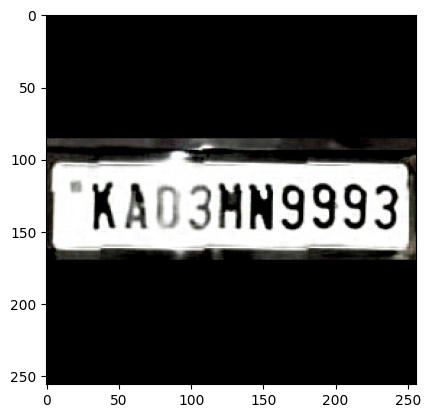

In [7]:
model=Sequential()
#Encoder:
model.add(Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(256,256,3)))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Conv2D(32, (3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Conv2D(16, (3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2), padding='same'))

#Decoder:
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))

model.add(Conv2D(3, (3,3), activation='relu', padding='same'))

#Regression using Early Stopping
#Deprecated due to variations in accuracy values of 2000 epochs 
 
#callback = keras.callbacks.EarlyStopping(monitor='loss', patience=10)

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

model.summary()

model.fit(img_final, img_final, epochs=2000, shuffle=True)


pred=model.predict(img_final)

plt.imshow(pred[0].reshape(256,256,3))

plt.savefig('output.png')

### Text Detection

In [8]:
#Path of reconstructed image:
Output_path = "output.png"
#Output_path = "data\image (1).png"

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


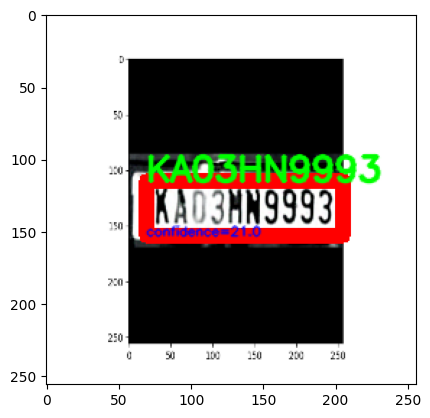

In [9]:
image = cv2.imread(Output_path)
image = cv2.resize(image, (256,256))

reader = easyocr.Reader(['en'],gpu= True)
result = reader.readtext(image)

confidence = result[0][2]
acc = "confidence=" + str(round(confidence, 2)*100)

prediction = ''.join(letter for letter in result[0][1] if letter.isalnum())
prediction = prediction.upper()

coord = tuple(result[0][0])
x1 = coord[0]
x2 = coord[2]
x3 = coord[3]
font = cv2.FONT_HERSHEY_SIMPLEX

cv2.rectangle(image, x1,x2, (255,0,0), 10)
cv2.putText(image,prediction,x1,font,0.8,(0,255,0),2,cv2.LINE_AA)
cv2.putText(image,acc,x3,font,0.3,(0,0,255),1,cv2.LINE_AA)

image = plt.imshow(image)
plt.show(image)